## 课程论文

 请务必交到exer8文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请于12月30日前先在github上提交
+ 请在元旦后提交纸质版，将本页面文件先打印为pdf格式，再去打印店付印
+ 请将论文模板和本页面文件一起装订，前者放上面，本页面文件放下面
+ 纸质版提交时间和地点请留意微信群通知

请写一下姓名和学号：
+ 姓名  廖之奇
+ 学号  0162452

In [20]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 样本均值分布的统计试验

+ 请将CEPS.csv数据读入python
+ 请从中随机抽取1000个数据
+ 请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
+ 计算这两个连续变量的均值
+ 重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值
+ 绘制这30个样本均值的直方图
+ 计算均值的均值和标准误
（中心极限定理）

In [2]:
sentinels = {'a17': [' '], 'b18a': [' '],'b18b':[' ']}
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)
df

D:\Data\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
0,1,1,1,1,3,3,218.738892,0,0,11,...,3,1,,,3,3,3,1,1,2
1,2,1,1,1,3,3,216.518234,0,0,17,...,2,1,,,8,5,8,1,1,2
2,3,1,1,1,3,3,216.518234,0,0,12,...,2,2,1,3,3,3,3,1,1,1
3,4,1,1,1,3,3,218.738892,0,0,10,...,2,1,,,6,7,7,1,1,2
4,5,1,1,1,3,3,217.553040,0,0,10,...,3,1,,,7,8,8,1,1,2
5,6,1,1,1,3,3,218.738892,0,0,12,...,2,1,,,8,8,8,1,2,1
6,7,1,1,1,3,3,218.738892,0,0,14,...,2,1,,,4,6,6,1,1,2
7,8,1,1,1,3,3,216.518234,0,0,13,...,2,1,,,8,8,8,1,1,2
8,9,1,1,1,3,3,218.738892,0,0,10,...,2,1,,,6,7,7,1,1,2
9,10,1,1,1,3,3,216.518234,0,0,16,...,2,1,,,7,8,8,1,1,2


In [3]:
df1 = df.sample(n = 1000)
health = df1['a17'].mean()
hours = df1['b18a'].mean() + df1['b18b'].mean()/60
print('七年级学生平均整体健康状况：%f(满分为5分)'%health)
print('七年级学生平均每天晚上睡眠时间：%f小时'%hours)

七年级学生平均整体健康状况：4.071501(满分为5分)
七年级学生平均每天晚上睡眠时间：7.992927小时


(0, 5)

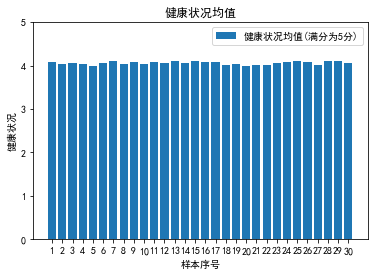

In [8]:
hh = {}
for i in range(30):
    data = df.sample(n = 1000)
    hh[i] = data['a17'].mean()

fig = plt.figure()
ax = plt.subplot()
ind = np.arange(len(hh.values())) 
width = 0.8
rects1 = ax.bar(ind+1, hh.values(), width,label='健康状况均值(满分为5分)')

ax.set_xlabel('样本序号')
ax.set_ylabel('健康状况')
ax.set_title('健康状况均值')
ax.set_xticks(ind+1)
ax.legend()
ax.set_ylim(0,5)

(0, 10)

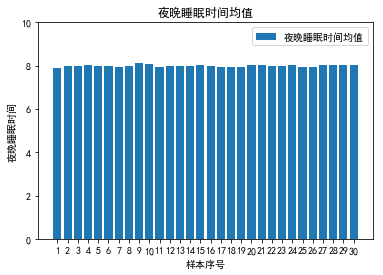

In [9]:
hr = {}
for i in range(30):
    data = df.sample(n = 1000)
    hr[i] = data['b18a'].mean() + data['b18b'].mean()/60

fig = plt.figure()
ax = plt.subplot()
ind = np.arange(len(hr.values())) 
width = 0.8
rects1 = ax.bar(ind+1, hr.values(), width,label='夜晚睡眠时间均值')

ax.set_xlabel('样本序号')
ax.set_ylabel('夜晚睡眠时间')
ax.set_title('夜晚睡眠时间均值')
ax.set_xticks(ind+1)
ax.legend()
ax.set_ylim(0,10)

In [19]:
m1=sum(hh.values())/len(hh)
print('身体状况样本均值的均值为%f'%m1)
i = 1
sum1 = 0
while i < 30:
    sum1 += (hh[i]-m1)**2
    i += 1
s1 = (sum1 / 30)**0.5
print('身体状况样本均值的标准差为%f' %s1)

print('\n')

m2=sum(hr.values())/len(hr)
print('夜晚睡眠时间样本均值的均值为%f'%m2)
i = 1
sum2 = 0
while i < 30:
    sum2 += (hr[i]-m2)**2
    i += 1
s2 = (sum2 / 30)**0.5
print('夜晚睡眠时间样本均值的标准差为%f' %s2)

身体状况样本均值的均值为4.057865
身体状况样本均值的标准差为0.034273


夜晚睡眠时间样本均值的均值为7.988790
夜晚睡眠时间样本均值的标准差为0.043507


### 回归分析

+ 请从CEPS.csv数据里挑选若干变量建立回归方程，要求至少三个自变量
    + 如，学生的学业成绩受认知水平、家庭收入的影响
    + 考虑因变量和自变量间的实质关系，变量间关系应该是有意义
    + 选择自变量时，注意变量的类型，如果是分类变量，需要进行编码
+ 请报告回归方程的结果，需要包括：
    + 模型拟合指标
    + 模型的显著性检验结果
    + 变量的系数
    + 各系数的显著性检验结果
    + 对模型结果的解释
    

+ 挑选成绩c12作为因变量y
+ 父母双方的受教育程度(b06+b07)，一周写作业的时间（(b14a1+b14a2/60)*5+(b14b1+b14b2/60)*2)和老师表扬情况(c1307+c1308+c1309)作为自变量x1,x2,x3

In [23]:
sentinels = {'c12': [' '],'b06': [' '], 'b07': [' '], 'b14a1': [' '], 'b14a2': [' '], 'b14b1': [' '], 'b14b2': [' '],'c1307': [' '], 'c1308': [' '], 'c1309': [' ']}
df2 = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)
df2

D:\Data\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
0,1,1,1,1,3,3,218.738892,0,0,11,...,3,1,,,3,3,3,1,1,2
1,2,1,1,1,3,3,216.518234,0,0,17,...,2,1,,,8,5,8,1,1,2
2,3,1,1,1,3,3,216.518234,0,0,12,...,2,2,1,3,3,3,3,1,1,1
3,4,1,1,1,3,3,218.738892,0,0,10,...,2,1,,,6,7,7,1,1,2
4,5,1,1,1,3,3,217.553040,0,0,10,...,3,1,,,7,8,8,1,1,2
5,6,1,1,1,3,3,218.738892,0,0,12,...,2,1,,,8,8,8,1,2,1
6,7,1,1,1,3,3,218.738892,0,0,14,...,2,1,,,4,6,6,1,1,2
7,8,1,1,1,3,3,216.518234,0,0,13,...,2,1,,,8,8,8,1,1,2
8,9,1,1,1,3,3,218.738892,0,0,10,...,2,1,,,6,7,7,1,1,2
9,10,1,1,1,3,3,216.518234,0,0,16,...,2,1,,,7,8,8,1,1,2


In [25]:
data=pd.DataFrame({'y':df2.c12,
                  'x1':df2.b06+df2.b07,
                  'x2':(df2.b14a1+df2.b14a2/60)*5+(df2.b14b1+df2.b14b2/60)*2,
                  'x3':df2.c1307+df2.c1308+df2.c1309,})
data=data.dropna(axis=0,how='any')
data

,x1,x2,x3,y
0,6.0,17.166667,12.0,4.0
1,13.0,23.000000,12.0,4.0
2,6.0,7.000000,8.0,3.0
3,13.0,21.000000,12.0,2.0
4,15.0,13.833333,8.0,4.0
5,16.0,18.000000,9.0,3.0
6,10.0,21.000000,6.0,3.0
7,16.0,23.000000,12.0,5.0
8,13.0,10.666667,9.0,4.0
9,15.0,11.500000,8.0,3.0


In [27]:
model_x= ['x1','x2','x3']
X = data.loc[ :,model_x].values
y=data['y'].values
X_model = sm.add_constant(X)
model = sm.OLS(y, X) 
results = model.fit()
print(results.params)

[ 0.11182062  0.01343572  0.24556107]


In [28]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 3.922e+04
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        11:52:22   Log-Likelihood:                -28042.
No. Observations:               17679   AIC:                         5.609e+04
Df Residuals:                   17676   BIC:                         5.611e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.1118      0.002     51.070      0.0

回归方程结果报告

模型拟合指标
    判定系数R²=0.869,说明模型的拟合较好。

模型的显著性检验结果
    P<0.05，说明该模型的结果是统计显著的。

变量的系数
    x1:0.1118
    x2:0.0134
    x3:0.2456
    此三个变量与因变量均呈正相关。

各系数的显著性检验结果
    x1.p<0.05
    x2.p<0.05
    x3.p<0.05
    此三个自变量是统计显著的，说明父母双方的受教育程度，一周写作业的时间和老师表扬情况对学习成绩有显著影响。

对模型结果的解释
    父母双方的受教育程度，一周写作业的时间和老师表扬情况对学习成绩有正向相关关系。
    父母双方的受教育程度越高，花在写作业上时间越多，老师多表扬，学生的成绩会普遍高。